In [23]:
import ast
import pandas as pd
import torch

from data_processing import save_probabilities
from visualization import view_plateau

In [24]:
# checkpoint = torch.load('../saved_models/orthography_3gen.pth')
# train_char_probs = checkpoint['train_char_prediction_probs']
# valid_char_probs = checkpoint['valid_char_prediction_probs']

# save_probabilities(valid_char_probs, nlexique[['lexeme', 'gen']], '../results/orthography_3gen.csv', mode='w', set='validation')
# save_probabilities(train_char_probs, nlexique[['lexeme', 'gen']], '../results/orthography_3gen.csv', mode='a', set='train')

# or3_results = pd.read_csv('../results/orthography_3gen.csv')
# or3_results

In [25]:
# or3_results['Noun_Length'] = or3_results['Nouns'].apply(len)
# or3_results['Probabilities_Length'] = or3_results['Class Probabilities'].apply(lambda x: len(ast.literal_eval(x)))

# filtered_df = or3_results[or3_results['Probabilities_Length'] != or3_results['Noun_Length']]

# filtered_df

## Suffix vs Non-suffix Words

In [26]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique = nlexique[['lexeme', 'sg', 'gen']].rename(columns={'sg': 'phon'}).dropna().reset_index(drop=True)
nlexique

,lexeme,phon,gen
0,à-côté,akOte,m
1,à-coup,aku,m
2,à-peu-près,apØpʁɛ,m
3,à-pic,apik,m
4,à-plat,apla,m
...,...,...,...
30999,zurichois,zyʁikwa,m
31000,zydeco,zidəko,f
31001,zygoma,zigOma,m
31002,zygote,zigɔt,m


In [27]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')
echantinom = echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])][['lemma', 'phon', 'gen']]
echantinom

,lemma,phon,gen
0,berlingue,bɛʁ.lɛ̃g,m
1,corton,kɔʁ.tɔ̃,m
2,dabuche,da.byʃ,f
3,faf,faf,m
4,gail,gaj,f
...,...,...,...
4995,palu,pa.ly,m
4996,talc,talk,m
4997,sauvetage,sO.və.taʒ,m
4998,plaid,plɛd,m


### Orthographic forms

In [28]:
orth_preds = pd.read_csv('../results/echantinom_orth_preds.csv')
orth_preds

,Word,Predicted Gender,True Gender,Class Probabilities,Set
0,té,m,m,"[('é', {'f': 0.2823171615600586, 'm': 0.717682...",test
1,an,m,m,"[('n', {'f': 0.3856637179851532, 'm': 0.614336...",test
2,bi,m,m,"[('i', {'f': 0.1368861347436905, 'm': 0.863113...",test
3,as,m,m,"[('s', {'f': 0.2511462867259979, 'm': 0.748853...",test
4,lob,m,m,"[('b', {'f': 0.17484816908836365, 'm': 0.82515...",test
...,...,...,...,...,...
4527,approvisionnement,m,m,"[('t', {'f': 0.5394183993339539, 'm': 0.460581...",test
4528,sous-alimentation,f,f,"[('n', {'f': 0.3856637179851532, 'm': 0.614336...",test
4529,cul-de-basse-fosse,m,m,"[('e', {'f': 0.11505153775215149, 'm': 0.88494...",test
4530,marie-couche-toi-là,f,f,"[('à', {'f': 0.09994786977767944, 'm': 0.90005...",test


In [29]:
orth_correct = orth_preds[orth_preds['Predicted Gender'] == orth_preds['True Gender']]

orth_percentage_correct = (orth_correct.shape[0] / orth_preds.shape[0]) * 100
orth_percentage_correct


90.75463371579876

In [30]:
incorrect = orth_preds[orth_preds['Predicted Gender'] != orth_preds['True Gender']]
incorrect

,Word,Predicted Gender,True Gender,Class Probabilities,Set
16,axe,f,m,"[('e', {'f': 0.11505153775215149, 'm': 0.88494...",test
19,glu,m,f,"[('u', {'f': 0.5012757778167725, 'm': 0.498724...",test
25,are,f,m,"[('e', {'f': 0.11505153775215149, 'm': 0.88494...",test
30,eau,m,f,"[('u', {'f': 0.5012757778167725, 'm': 0.498724...",test
32,obi,m,f,"[('i', {'f': 0.1368861347436905, 'm': 0.863113...",test
...,...,...,...,...,...
4416,croquemitaine,f,m,"[('e', {'f': 0.11505153775215149, 'm': 0.88494...",test
4419,archimandrite,f,m,"[('e', {'f': 0.11505153775215149, 'm': 0.88494...",test
4509,transatlantique,f,m,"[('e', {'f': 0.11505153775215149, 'm': 0.88494...",test
4515,perpendiculaire,m,f,"[('e', {'f': 0.11505153775215149, 'm': 0.88494...",test


In [31]:
# [word for word in echantinom_preds['Word'].tolist() if word.endswith('age')]

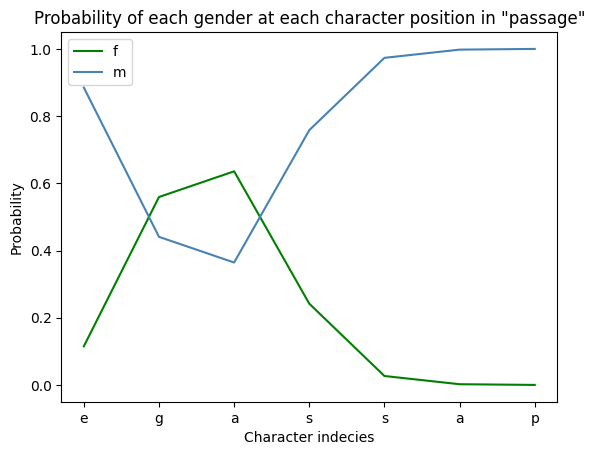

Probability values:
  [('e', {'f': 0.11505153775215149, 'm': 0.8849484920501709}), ('g', {'f': 0.5592625141143799, 'm': 0.4407374858856201}), ('a', {'f': 0.6356568932533264, 'm': 0.3643430173397064}), ('s', {'f': 0.2418748289346695, 'm': 0.7581251859664917}), ('s', {'f': 0.026697373017668724, 'm': 0.9733026027679443}), ('a', {'f': 0.0022462394554167986, 'm': 0.9977537989616394}), ('p', {'f': 0.00014647639181930572, 'm': 0.9998534917831421})]
----------------------------------------------------------------------------------------------------



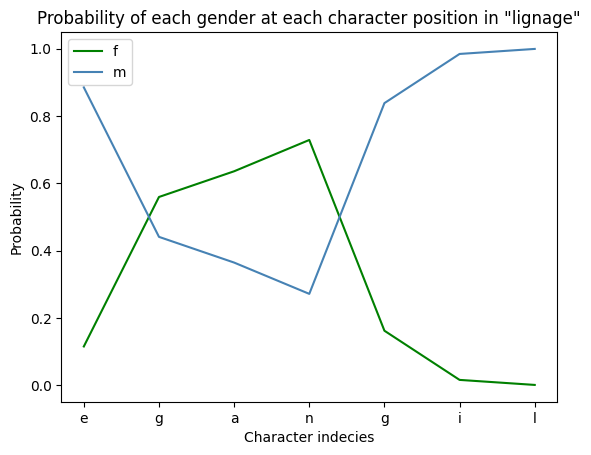

Probability values:
  [('e', {'f': 0.11505153775215149, 'm': 0.8849484920501709}), ('g', {'f': 0.5592625141143799, 'm': 0.4407374858856201}), ('a', {'f': 0.6356568932533264, 'm': 0.3643430173397064}), ('n', {'f': 0.7286689281463623, 'm': 0.2713310420513153}), ('g', {'f': 0.16181237995624542, 'm': 0.8381876349449158}), ('i', {'f': 0.015683922916650772, 'm': 0.9843160510063171}), ('l', {'f': 0.0007534713367931545, 'm': 0.9992465972900391})]
----------------------------------------------------------------------------------------------------



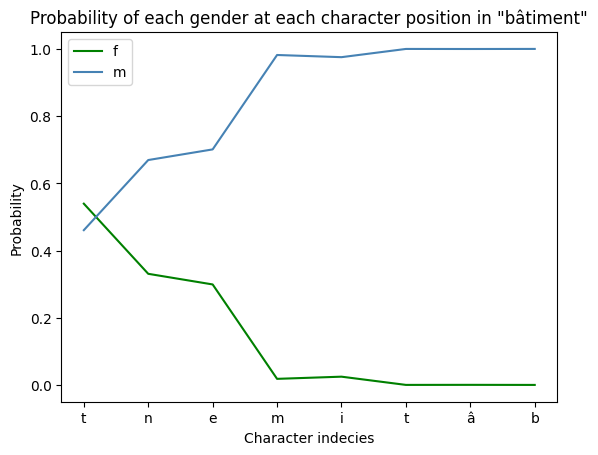

Probability values:
  [('t', {'f': 0.5394183993339539, 'm': 0.46058154106140137}), ('n', {'f': 0.3307057321071625, 'm': 0.6692942380905151}), ('e', {'f': 0.2990482747554779, 'm': 0.7009517550468445}), ('m', {'f': 0.018088920041918755, 'm': 0.9819111227989197}), ('i', {'f': 0.024571482092142105, 'm': 0.9754285216331482}), ('t', {'f': 8.630067168269306e-05, 'm': 0.9999136924743652}), ('â', {'f': 0.0002588327624835074, 'm': 0.9997411370277405}), ('b', {'f': 2.8516309612314217e-05, 'm': 0.9999715089797974})]
----------------------------------------------------------------------------------------------------



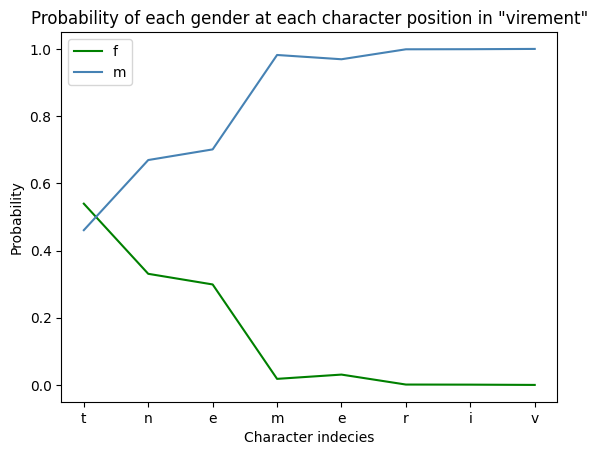

Probability values:
  [('t', {'f': 0.5394183993339539, 'm': 0.46058154106140137}), ('n', {'f': 0.3307057321071625, 'm': 0.6692942380905151}), ('e', {'f': 0.2990482747554779, 'm': 0.7009517550468445}), ('m', {'f': 0.018088920041918755, 'm': 0.9819111227989197}), ('e', {'f': 0.030800428241491318, 'm': 0.969199538230896}), ('r', {'f': 0.0011635632254183292, 'm': 0.9988364577293396}), ('i', {'f': 0.0008833892061375082, 'm': 0.9991165995597839}), ('v', {'f': 5.613039684249088e-05, 'm': 0.9999438524246216})]
----------------------------------------------------------------------------------------------------



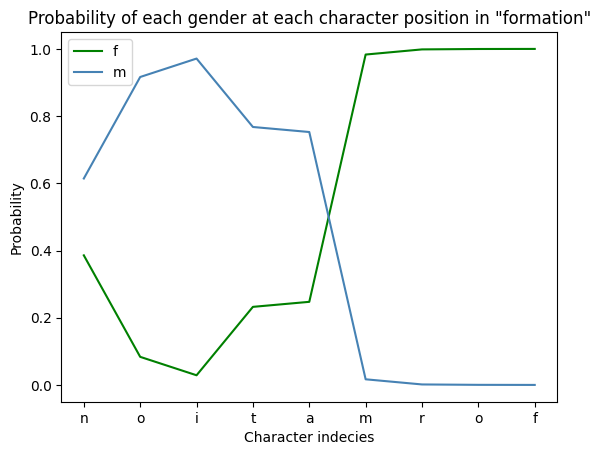

Probability values:
  [('n', {'f': 0.3856637179851532, 'm': 0.6143363118171692}), ('o', {'f': 0.08364634960889816, 'm': 0.9163536429405212}), ('i', {'f': 0.028814779594540596, 'm': 0.9711851477622986}), ('t', {'f': 0.23238961398601532, 'm': 0.7676103711128235}), ('a', {'f': 0.24736066162586212, 'm': 0.7526393532752991}), ('m', {'f': 0.9831567406654358, 'm': 0.016843296587467194}), ('r', {'f': 0.9984728693962097, 'm': 0.00152711127884686}), ('o', {'f': 0.9996621608734131, 'm': 0.00033781028469093144}), ('f', {'f': 0.9998881816864014, 'm': 0.00011175063991686329})]
----------------------------------------------------------------------------------------------------



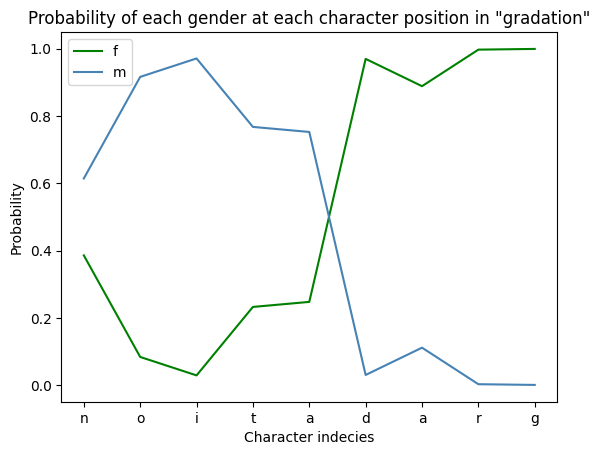

Probability values:
  [('n', {'f': 0.3856637179851532, 'm': 0.6143363118171692}), ('o', {'f': 0.08364634960889816, 'm': 0.9163536429405212}), ('i', {'f': 0.028814779594540596, 'm': 0.9711851477622986}), ('t', {'f': 0.23238961398601532, 'm': 0.7676103711128235}), ('a', {'f': 0.24736066162586212, 'm': 0.7526393532752991}), ('d', {'f': 0.9699060916900635, 'm': 0.030093906447291374}), ('a', {'f': 0.8887531161308289, 'm': 0.11124689131975174}), ('r', {'f': 0.9973902106285095, 'm': 0.0026097677182406187}), ('g', {'f': 0.9995172023773193, 'm': 0.0004828499804716557})]


In [32]:
view_plateau('passage', orth_preds)
print('-' * 100 + '\n')
view_plateau('lignage', orth_preds)
print('-' * 100 + '\n')
view_plateau('bâtiment', orth_preds)
print('-' * 100 + '\n')
view_plateau('virement', orth_preds)
print('-' * 100 + '\n')
view_plateau('formation', orth_preds)
print('-' * 100 + '\n')
view_plateau('gradation', orth_preds)

### Phonetic forms

In [33]:
phon_preds = pd.read_csv('../results/echantinom_phon_preds.csv')
phon_preds

,Word,Predicted Gender,True Gender,Class Probabilities,Set
0,ɛ,m,f,"[('ɛ', {'f': 0.4145492911338806, 'm': 0.585450...",test
1,ɛ,m,m,"[('ɛ', {'f': 0.4145492911338806, 'm': 0.585450...",test
2,u,m,m,"[('u', {'f': 0.7586797475814819, 'm': 0.241320...",test
3,o,m,f,"[('o', {'f': 0.4365490674972534, 'm': 0.563450...",test
4,ʃu,m,m,"[('u', {'f': 0.7586797475814819, 'm': 0.241320...",test
...,...,...,...,...,...
4527,ʁəstʁyktyʁasjɔ̃,f,f,"[('̃', {'f': 0.7579514980316162, 'm': 0.242048...",test
4528,ɛ̃kɔ̃patibilite,f,f,"[('e', {'f': 0.5610597729682922, 'm': 0.438940...",test
4529,tʁɑ̃splɑ̃tasjɔ̃,f,f,"[('̃', {'f': 0.7579514980316162, 'm': 0.242048...",test
4530,suzalimɑ̃tasjɔ̃,f,f,"[('̃', {'f': 0.7579514980316162, 'm': 0.242048...",test


In [34]:
phon_preds['Noun_Length'] = phon_preds['Word'].apply(len)
phon_preds['Probabilities_Length'] = phon_preds['Class Probabilities'].apply(lambda x: len(ast.literal_eval(x)))

filtered_df = phon_preds[phon_preds['Probabilities_Length'] != phon_preds['Noun_Length']]

filtered_df

,Word,Predicted Gender,True Gender,Class Probabilities,Set,Noun_Length,Probabilities_Length


In [35]:
phon_correct = phon_preds[phon_preds['Predicted Gender'] == phon_preds['True Gender']]

phon_percentage_correct = (phon_correct.shape[0] / phon_preds.shape[0]) * 100
phon_percentage_correct


80.9135039717564

In [36]:
phon_incorrect = phon_preds[phon_preds['Predicted Gender'] != phon_preds['True Gender']]
phon_incorrect

,Word,Predicted Gender,True Gender,Class Probabilities,Set,Noun_Length,Probabilities_Length
0,ɛ,m,f,"[('ɛ', {'f': 0.4145492911338806, 'm': 0.585450...",test,1,1
3,o,m,f,"[('o', {'f': 0.4365490674972534, 'm': 0.563450...",test,1,1
11,ɔm,f,m,"[('m', {'f': 0.8083187937736511, 'm': 0.191681...",test,2,2
12,œf,f,m,"[('f', {'f': 0.7858923673629761, 'm': 0.214107...",test,2,2
13,œj,f,m,"[('j', {'f': 0.06380388885736465, 'm': 0.93619...",test,2,2
...,...,...,...,...,...,...,...
4479,kɔ̃vɑ̃sjOnɛl,f,m,"[('l', {'f': 0.25605377554893494, 'm': 0.74394...",test,12,12
4487,pɛʁpɑ̃dikylɛʁ,m,f,"[('ʁ', {'f': 0.36734071373939514, 'm': 0.63265...",test,13,13
4493,kɔ̃tʁəlamɔ̃tʁ,f,m,"[('ʁ', {'f': 0.36734071373939514, 'm': 0.63265...",test,13,13
4504,ɛ̃tɛʁnasjOnal,f,m,"[('l', {'f': 0.25605377554893494, 'm': 0.74394...",test,13,13


In [37]:
nlexique[nlexique['lexeme'].isin(['passage', 'lignage', 'bâtiment', 'virement', 'formation', 'gradation'])]

,lexeme,phon,gen
2918,bâtiment,batimɑ̃,m
12741,formation,fɔʁmasjɔ̃,f
14020,gradation,gʁadasjɔ̃,f
17177,lignage,liɲaʒ,m
21487,passage,pasaʒ,m
30582,virement,viʁəmɑ̃,m


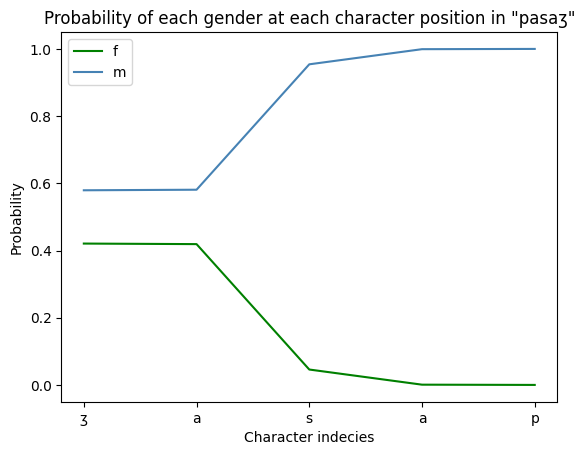

Probability values:
  [('ʒ', {'f': 0.42073318362236023, 'm': 0.5792668461799622}), ('a', {'f': 0.419073224067688, 'm': 0.580926775932312}), ('s', {'f': 0.04596129432320595, 'm': 0.9540387392044067}), ('a', {'f': 0.0009176180465146899, 'm': 0.9990823268890381}), ('p', {'f': 0.0001644047733861953, 'm': 0.9998356103897095})]
----------------------------------------------------------------------------------------------------



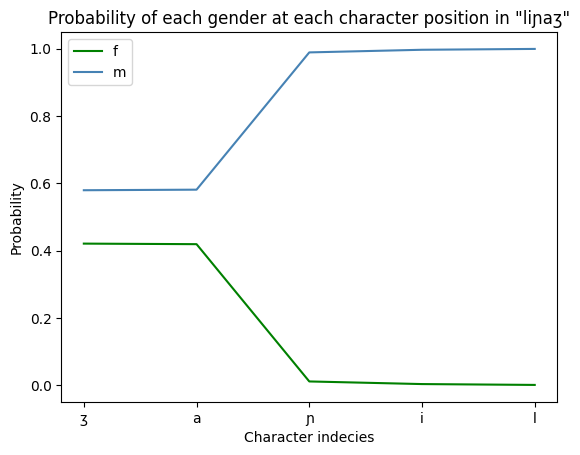

Probability values:
  [('ʒ', {'f': 0.42073318362236023, 'm': 0.5792668461799622}), ('a', {'f': 0.419073224067688, 'm': 0.580926775932312}), ('ɲ', {'f': 0.011378785595297813, 'm': 0.988621175289154}), ('i', {'f': 0.0035714064724743366, 'm': 0.9964285492897034}), ('l', {'f': 0.0010464799124747515, 'm': 0.9989534616470337})]
----------------------------------------------------------------------------------------------------



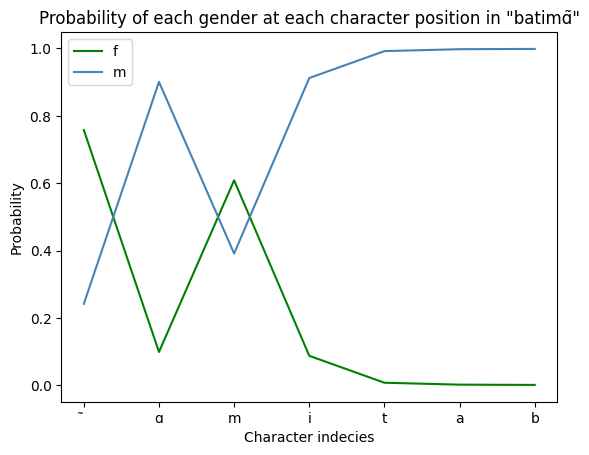

Probability values:
  [('̃', {'f': 0.7579514980316162, 'm': 0.2420484870672226}), ('ɑ', {'f': 0.0992191731929779, 'm': 0.9007808566093445}), ('m', {'f': 0.6086331605911255, 'm': 0.3913668692111969}), ('i', {'f': 0.0877067893743515, 'm': 0.9122931957244873}), ('t', {'f': 0.007851568050682545, 'm': 0.9921483993530273}), ('a', {'f': 0.002168584382161498, 'm': 0.997831404209137}), ('b', {'f': 0.0013669923646375537, 'm': 0.9986329674720764})]
----------------------------------------------------------------------------------------------------



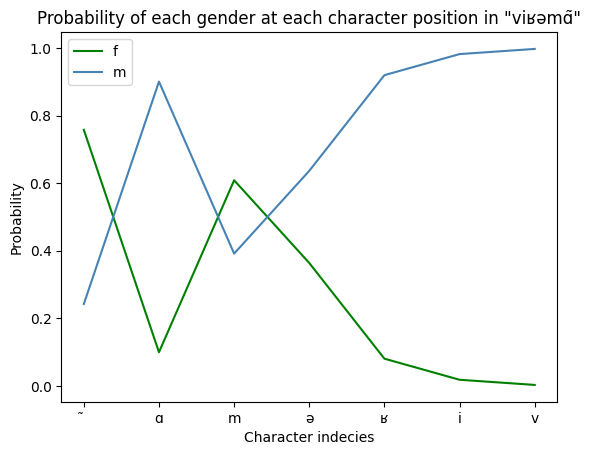

Probability values:
  [('̃', {'f': 0.7579514980316162, 'm': 0.2420484870672226}), ('ɑ', {'f': 0.0992191731929779, 'm': 0.9007808566093445}), ('m', {'f': 0.6086331605911255, 'm': 0.3913668692111969}), ('ə', {'f': 0.3634848892688751, 'm': 0.6365150809288025}), ('ʁ', {'f': 0.08009368181228638, 'm': 0.9199063181877136}), ('i', {'f': 0.01768326945602894, 'm': 0.982316792011261}), ('v', {'f': 0.002395456423982978, 'm': 0.9976045489311218})]
----------------------------------------------------------------------------------------------------



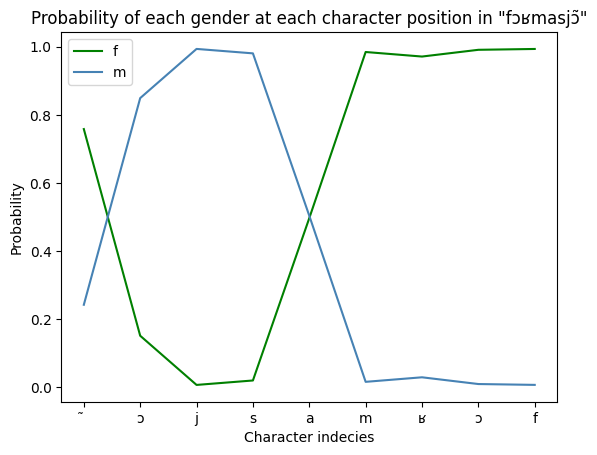

Probability values:
  [('̃', {'f': 0.7579514980316162, 'm': 0.2420484870672226}), ('ɔ', {'f': 0.1511424034833908, 'm': 0.8488576412200928}), ('j', {'f': 0.006713589653372765, 'm': 0.9932864308357239}), ('s', {'f': 0.019755735993385315, 'm': 0.9802442789077759}), ('a', {'f': 0.4964210093021393, 'm': 0.5035789608955383}), ('m', {'f': 0.9842303395271301, 'm': 0.015769649296998978}), ('ʁ', {'f': 0.9708935618400574, 'm': 0.02910641022026539}), ('ɔ', {'f': 0.9906983971595764, 'm': 0.009301540441811085}), ('f', {'f': 0.9931601285934448, 'm': 0.006839856971055269})]
----------------------------------------------------------------------------------------------------



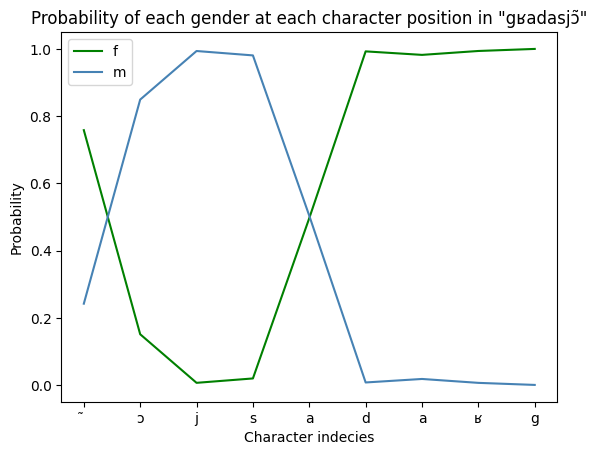

Probability values:
  [('̃', {'f': 0.7579514980316162, 'm': 0.2420484870672226}), ('ɔ', {'f': 0.1511424034833908, 'm': 0.8488576412200928}), ('j', {'f': 0.006713589653372765, 'm': 0.9932864308357239}), ('s', {'f': 0.019755735993385315, 'm': 0.9802442789077759}), ('a', {'f': 0.4964210093021393, 'm': 0.5035789608955383}), ('d', {'f': 0.9922145009040833, 'm': 0.007785537280142307}), ('a', {'f': 0.9817904233932495, 'm': 0.01820957101881504}), ('ʁ', {'f': 0.9933933615684509, 'm': 0.006606596056371927}), ('g', {'f': 0.9995096921920776, 'm': 0.0004903139779344201})]


In [38]:
view_plateau('pasaʒ', phon_preds)
print('-' * 100 + '\n')
view_plateau('liɲaʒ', phon_preds)
print('-' * 100 + '\n')
view_plateau('batimɑ̃', phon_preds)
print('-' * 100 + '\n')
view_plateau('viʁəmɑ̃', phon_preds)
print('-' * 100 + '\n')
view_plateau('fɔʁmasjɔ̃', phon_preds)
print('-' * 100 + '\n')
view_plateau('gʁadasjɔ̃', phon_preds)